# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

Форма для сдачи будет опубликована позднее.

### Пожалуйста, не производите никаких манипуляций с  переменной `_dict_for_submission` и с ячейками, в которых она используется. На ее основе будет сгенерирован итоговый файл для сдачи задания.

In [1]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission = dict()


def transform_list(list_of_ints):
    return [str(x) for x in list_of_ints]
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 1. Небольшой numpy-разогрев. (10%)

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Создайте матрицу A размерами 10 на 10 из упорядоченных целых чисел от 0 до 100
# hint: np.arange(100).reshape((10, 10))

A = np.arange(100).reshape((10, 10))

In [4]:
# Посчитайте средние значения в матрице по столбцам

# Ваш код здесь
A.mean(0)

array([45., 46., 47., 48., 49., 50., 51., 52., 53., 54.])

In [5]:
# Транспонируйте матрицу A

A.T

array([[ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       [ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
       [ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92],
       [ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],
       [ 4, 14, 24, 34, 44, 54, 64, 74, 84, 94],
       [ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
       [ 6, 16, 26, 36, 46, 56, 66, 76, 86, 96],
       [ 7, 17, 27, 37, 47, 57, 67, 77, 87, 97],
       [ 8, 18, 28, 38, 48, 58, 68, 78, 88, 98],
       [ 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]])

In [6]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

A * A.T

array([[   0,   10,   40,   90,  160,  250,  360,  490,  640,  810],
       [  10,  121,  252,  403,  574,  765,  976, 1207, 1458, 1729],
       [  40,  252,  484,  736, 1008, 1300, 1612, 1944, 2296, 2668],
       [  90,  403,  736, 1089, 1462, 1855, 2268, 2701, 3154, 3627],
       [ 160,  574, 1008, 1462, 1936, 2430, 2944, 3478, 4032, 4606],
       [ 250,  765, 1300, 1855, 2430, 3025, 3640, 4275, 4930, 5605],
       [ 360,  976, 1612, 2268, 2944, 3640, 4356, 5092, 5848, 6624],
       [ 490, 1207, 1944, 2701, 3478, 4275, 5092, 5929, 6786, 7663],
       [ 640, 1458, 2296, 3154, 4032, 4930, 5848, 6786, 7744, 8722],
       [ 810, 1729, 2668, 3627, 4606, 5605, 6624, 7663, 8722, 9801]])

In [7]:
# Посчитайте matrix product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Matrix_multiplication
# or https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

B = A.dot(A)

#### Не меняйте следующую ячейку. Просто запустите ее.

In [8]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['B'] = transform_list(list(B.flatten()))
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [9]:
import pandas as pd

In [10]:
# If on colab, uncomment the following lines

# !wget "https://downloader.disk.yandex.com/disk/cd3ead013809a9da37434c792796d4b063dfc89571c68c273ca3788013b82bf8/5d865a2d/8bfV6Unxao6CYWcER5-G5fza25GZaFjE_xFvc0-ExCwlqmFjBf2bynRfBnL6ubJC8XhsoYHi7h9Nu6gfvS8wxg%3D%3D?uid=76549735&filename=forest_dataset.csv&disposition=attachment&hash=&limit=0&content_type=application%2Fvnd.ms-excel&owner_uid=76549735&fsize=1293856&hid=9b439c18e67923b45c3b3d8891bdf9ab&media_type=spreadsheet&tknv=v2&etag=45e530aa3c9796cb705d4e27be7a6e9c" -O forest_dataset.csv

In [11]:
all_data = pd.read_csv('forest_dataset.csv')

Выделим 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей (до конца ноутбука она более не используется), в `all_data` поместим оставшиеся 80%. Не будем перемешивать данные сознательно (для удобства проверки).

In [12]:
delayed_data = all_data[int(0.8 * len(all_data)):]
all_data = all_data[:int(0.8 * len(all_data))]

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [13]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_feature_matrix = delayed_data[delayed_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [15]:
two_class_labels_indices = (labels == 1) + (labels == 2)
two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [16]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix, two_class_labels)

In [17]:
two_class_scaler = StandardScaler()
two_class_scaler.fit(train_feature_matrix)

train_feature_matrix_scaled = two_class_scaler.transform(train_feature_matrix)
test_feature_matrix_scaled = two_class_scaler.transform(test_feature_matrix)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [18]:
lr_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_clf.fit(train_feature_matrix_scaled, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# Ваш код здесь
print(accuracy_score(test_labels, lr_clf.predict(test_feature_matrix_scaled)))
print(f1_score(test_labels, lr_clf.predict(test_feature_matrix_scaled)))

0.7666277712952159
0.7241379310344828


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [20]:
from sklearn.pipeline import make_pipeline

In [21]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, labels,
                                                                                        test_size=0.2, random_state=42)

enhanced_clf = make_pipeline(StandardScaler(),
                             LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100000))
enhanced_clf.fit(train_feature_matrix, train_labels)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100000,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [22]:
from sklearn.model_selection import GridSearchCV

parameters = {'logisticregression__C': np.exp(np.linspace(-4, 4, 10)), 'logisticregression__penalty': ['l1', 'l2']}

gs_clf = GridSearchCV(enhanced_clf, parameters, scoring='accuracy', cv=5, n_jobs=-1)
gs_clf.fit(train_feature_matrix, train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100000,
                                                  

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

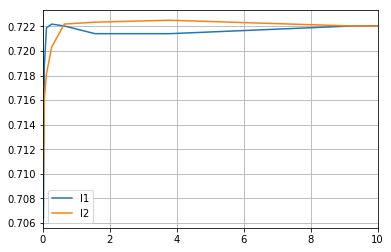

In [27]:
import matplotlib
import matplotlib.pyplot as plt

c = np.exp(np.linspace(-4, 4, 10))
l1_means = []
l2_means = []

for mean, params in zip(gs_clf.cv_results_['mean_test_score'], gs_clf.cv_results_['params']):
    if params['logisticregression__penalty'] == 'l1':
        l1_means.append(mean)
    else:
        l2_means.append(mean)

plt.plot(c, l1_means, label='l1')
plt.plot(c, l2_means, label='l2')
plt.legend()
plt.xlim(0, 10)
plt.grid()
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [25]:
gs_clf.best_params_

{'logisticregression__C': 3.7936678946831766,
 'logisticregression__penalty': 'l2'}

Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [28]:
best_lr_clf = make_pipeline(StandardScaler(),
                            LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100000,
                                               C=3.7936678946831766, penalty='l2'))
best_lr_clf.fit(train_feature_matrix, train_labels)
proba = best_lr_clf.predict_proba(test_feature_matrix)

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [29]:
proba = best_lr_clf.predict_proba(test_feature_matrix)
print('Classifier', proba.mean(0))

freq = np.zeros(7)
for label in train_labels:
    freq[label - 1] += 1
freq /= np.sum(freq)
print('Training set', freq)

print(accuracy_score(test_labels, best_lr_clf.predict(test_feature_matrix)))

Classifier [0.37294926 0.48824676 0.06244657 0.00551717 0.01664494 0.02664633
 0.02754897]
Training set [0.3715625  0.485625   0.05828125 0.00515625 0.0171875  0.028125
 0.0340625 ]
0.7175


#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = make_pipeline(StandardScaler(),
                        KNeighborsClassifier())

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [31]:
parameters = {'kneighborsclassifier__weights': ['uniform', 'distance'], 'kneighborsclassifier__n_neighbors': np.arange(1, 11)}

gs_clf = GridSearchCV(knn_clf, parameters, scoring='accuracy', cv=5)
gs_clf.fit(train_feature_matrix, train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                  

{'kneighborsclassifier__n_neighbors': 6, 'kneighborsclassifier__weights': 'distance'}


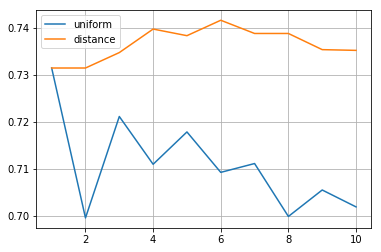

In [33]:
print(gs_clf.best_params_)

n = np.arange(1, 11)
uniform = []
distance = []

for mean, params in zip(gs_clf.cv_results_['mean_test_score'], gs_clf.cv_results_['params']):
    if params['kneighborsclassifier__weights'] == 'uniform':
        uniform.append(mean)
    else:
        distance.append(mean)

plt.plot(n, uniform, label='uniform')
plt.plot(n, distance, label='distance')
plt.legend()
plt.grid()

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [34]:
gs_clf.predict_proba(test_feature_matrix)

array([[0.82078436, 0.17921564, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.87162401, 0.12837599, ..., 0.        , 0.        ,
        0.        ],
       [0.84729505, 0.15270495, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43765227, 0.56234773, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.48160727, 0.51839273, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Создайте объект `best_knn_clf`, который представляет собой лучший классификатор.

In [35]:
# Hint: для этого достаточно указать стратегию вычисления весов и число соседей в конструкторе
best_knn_clf = KNeighborsClassifier(n_neighbors=6, weights='distance')
best_knn_clf.fit(train_feature_matrix, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии `best_lr_clf` и лучшего kNN `best_knn_clf` на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [36]:
print(accuracy_score(delayed_labels, best_lr_clf.predict(delayed_feature_matrix)))
print(accuracy_score(delayed_labels, best_knn_clf.predict(delayed_feature_matrix)))

0.724
0.7525


#### Не меняйте следующую ячейку. Запустите ее для генерации `submission` файла.

In [37]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['best_lr_clf_delayed'] = transform_list(list(best_lr_clf.predict(delayed_feature_matrix)))
_dict_for_submission['best_knn_clf_delayed'] = transform_list(list(best_knn_clf.predict(delayed_feature_matrix)))

import json
with open('submission_hw1_basic.json', 'w') as iofile:
    json.dump(_dict_for_submission, iofile)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Данный файл необходимо будет прикрепить к Google-форме для сдачи домашнего задания. __Для идентификации используется e-mail, который вы указали при регистрации на курс. Проверка производится автоматически. Если вы подпишитесь другим e-mail'ом, задание просто не будет засчитано.__

На этом задание завершено. Мы будем рады, если вы оставите обратную связь по данному заданию [по ссылке](https://forms.gle/2qaf14ky3J6HZfe48). Она анонимна ;)